<a href="https://colab.research.google.com/github/DarynaSherenhova/sales-data-analysis/blob/main/Product_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data overview




In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go

drive.mount("/content/drive")
%cd /content/drive/MyDrive/Project

countries_data = pd.read_csv("countries.csv")
events_data = pd.read_csv("events.csv")
products_data = pd.read_csv("products.csv")


Mounted at /content/drive
/content/drive/MyDrive/Project


In [ ]:
countries_data.head()

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [ ]:
print(countries_data.shape)

(249, 5)


В таблиці countries_data можемо побачити колонки в яких містяться дані щодо найменування країн, регіонів, субрегіонів та їх кодів. Дана таблиця містить 249 рядків та 5 колонок.

In [ ]:
events_data.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


In [ ]:
print(events_data.shape)

(1330, 10)


 В таблиці events_data можемо побачити колонки в яких містяться дані щодо ідентифікаторів замовлення та продуктів, дані щодо дати замовлення, дати відправлення, пріоритету замовлення, коду країни, каналу продажів, інформацію щодо проданих одиниць, ціни за одиницю та вартості одиниці продукту. Дана таблиця містить 1330 рядків та 10 колонок.

In [ ]:
products_data.head()

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


In [ ]:
print(products_data.shape)

(12, 2)


В таблиці products_data можемо побачити колонки в яких містяться дані щодо ідентифікатора та категорії продуктів. Дана таблиця містить 12 рядків та 2 колонки.

### Ключові поля, що поєднують таблиці в датасеті
- таблиці events_data та products_data поєднують такі ключові поля як id та Product ID;
- таблиці events_data та countries_data поєднують такі ключові поля як Country Code та alpha-3

# 2. Data cleaning

In [ ]:
print(countries_data.isna().sum())

name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64


In [ ]:
print(countries_data.isna().sum() / countries_data.shape[0] * 100)

name          0.000000
alpha-2       0.401606
alpha-3       0.000000
region        0.401606
sub-region    0.401606
dtype: float64


Таблиця countries_data містить пропущені значення. Доля пропущених значень у вказаній таблиці займає приблизно 0.4%.

In [ ]:
print(events_data.isna().sum())

Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         2
Unit Price         0
Unit Cost          0
dtype: int64


In [ ]:
print(events_data.isna().sum() / events_data.shape[0] * 100)

Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      6.165414
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64


Таблиця events_data містить пропущені значення в колонках Country Code та Units Sold. Доля пропущених значень у колонці Country Code займає 6.165414%, а в колонці Units Sold - 0.150376%.

In [ ]:
print(products_data.isna().sum())

id           0
item_type    0
dtype: int64


Таблиця products_data не містить пропущених значень.

In [ ]:
countries_data["region"] = countries_data["region"].fillna('Unknown')
countries_data["sub-region"] = countries_data["sub-region"].fillna('Unknown')
countries_data["alpha-2"] = countries_data["alpha-2"].fillna('Unknown')


Так як таблиця countries_data в колонках region, sub-region та alpha-2 містить пропущені значення, заповнюємо ці пропуски конкретним значенням "Unknown", бо вказані колонки містять не числові дані. Тому для подальшого аналізу даних краще заповнити пропущені значення у вказаних колонках.

In [ ]:
events_data["Country Code"] = events_data["Country Code"].fillna('Unknown')


Колонка Country Code в таблиці events_data має категоріальний тип даних та містить інформацію про коди країн, тому відсутні значення в цій колонці краще заповнити конкретним значенням "Unknown".
"Unknown" дає можливість аналізувати ці країни окремо або ігнорувати їх при потребі.


In [ ]:
events_data["Units Sold"] = events_data["Units Sold"].fillna(events_data["Units Sold"].median())

Колонка Country Code в таблиці events_data має числовий тип даних, це ключовий показник обсягу продажів. Тому заповнюємо пропущені значення в цій колонці медіаною для повноти даних та збереження всіх рядків.

In [ ]:
countries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     249 non-null    object
 2   alpha-3     249 non-null    object
 3   region      249 non-null    object
 4   sub-region  249 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


Типи даних в таблиці countries_data відображено коректно

In [ ]:
events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1330 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1330 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


Можемо побачити, що в таблиці events_data в колонках Order Date та Ship Date некоректно відображено типи даних, тому здійснимо перетворення цих даних в тип datetime.

In [ ]:
events_data["Order Date"] = pd.to_datetime(events_data["Order Date"])
events_data["Ship Date"] = pd.to_datetime(events_data["Ship Date"])


In [ ]:
events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1330 non-null   int64         
 1   Order Date      1330 non-null   datetime64[ns]
 2   Ship Date       1330 non-null   datetime64[ns]
 3   Order Priority  1330 non-null   object        
 4   Country Code    1330 non-null   object        
 5   Product ID      1330 non-null   int64         
 6   Sales Channel   1330 non-null   object        
 7   Units Sold      1330 non-null   float64       
 8   Unit Price      1330 non-null   float64       
 9   Unit Cost       1330 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 104.0+ KB


Тепер в таблиці events_data типи даних відображено коректно

In [ ]:
products_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


Типи даних в таблиці products_data відображено коректно

Тепер потрібно дослідити дані на наявність дублікатів та за потреби зробити перетворення для усунення дублікатів

In [ ]:
countries_data.columns = countries_data.columns.str.strip()
text_cols = countries_data.select_dtypes(include='object').columns

countries_data[text_cols] = (
    countries_data[text_cols]
    .astype(str)
    .apply(lambda col: col.str.strip()
                      .str.replace(r"\s+", " ", regex=True)
                      .str.lower())
)

countries_data = countries_data.drop_duplicates()

duplicate_rows = countries_data.duplicated()
print(duplicate_rows)
print(duplicate_rows.sum())


0      False
1      False
2      False
3      False
4      False
       ...  
244    False
245    False
246    False
247    False
248    False
Length: 249, dtype: bool
0


In [ ]:
events_data.columns = events_data.columns.str.strip()
text_cols = events_data.select_dtypes(include='object').columns

events_data[text_cols] = (
    events_data[text_cols]
    .astype(str)
    .apply(lambda col: col.str.strip()
                      .str.replace(r"\s+", " ", regex=True)
                      .str.lower())
)

events_data = events_data.drop_duplicates()

duplicate_rows = events_data.duplicated()
print(duplicate_rows)
print(duplicate_rows.sum())

0       False
1       False
2       False
3       False
4       False
        ...  
1325    False
1326    False
1327    False
1328    False
1329    False
Length: 1330, dtype: bool
0


In [ ]:
products_data.columns = products_data.columns.str.strip()
text_cols = products_data.select_dtypes(include='object').columns

products_data[text_cols] = (
    products_data[text_cols]
    .astype(str)
    .apply(lambda col: col.str.strip()
                      .str.replace(r"\s+", " ", regex=True)
                      .str.lower())
)

products_data = products_data.drop_duplicates()

duplicate_rows = products_data.duplicated()
print(duplicate_rows)
print(duplicate_rows.sum())

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
dtype: bool
0


В датасеті проведено очищення назв колонок, тобто видалено пробіли зліва/справа від назв колонок.

Очищено значення у всіх текстових колонках:
-  видалено пробіли по краях;
- перетворено багаторазові пробіли на один;
- приведено до нижнього регістру.

Також видалено повні дублікати рядків.

При перевірці даних в датасеті дублікатів не виявлено.


Тепер перевіримо дані на наявність аномалій

In [ ]:
countries_data.describe()

,name,alpha-2,alpha-3,region,sub-region
count,249,249,249,249,249
unique,249,249,249,6,18
top,afghanistan,af,afg,africa,sub-saharan africa
freq,1,1,1,60,53


In [ ]:
events_data.describe()

,Order ID,Order Date,Ship Date,Product ID,Units Sold,Unit Price,Unit Cost
count,1.330000e+03,1330,1330,1330.000000,1330.000000,1330.000000,1330.000000
mean,5.412048e+08,2013-10-12 06:09:12.180451072,2013-11-06 00:46:33.383458816,5788.096241,4952.216541,264.893541,187.246812
min,1.006406e+08,2010-01-01 00:00:00,2010-01-10 00:00:00,1270.000000,2.000000,9.330000,6.920000
25%,3.190004e+08,2011-12-16 06:00:00,2012-01-03 00:00:00,3127.000000,2360.750000,81.730000,35.840000
50%,5.387164e+08,2013-10-17 00:00:00,2013-11-09 00:00:00,5988.000000,4962.000000,154.060000,97.440000
75%,7.544628e+08,2015-08-28 18:00:00,2015-10-03 18:00:00,8681.000000,7458.750000,437.200000,263.330000
max,9.998797e+08,2017-07-23 00:00:00,2017-08-31 00:00:00,8969.000000,9999.000000,668.270000,524.960000
std,2.573882e+08,NaN,NaN,2820.728878,2903.012194,217.323460,176.158873


In [ ]:
products_data.describe()

,id
count,12.000000
mean,5802.166667
std,2937.985452
min,1270.000000
25%,2959.000000
50%,6659.500000
75%,8390.000000
max,8969.000000


Викидів чи аномалій в даних не видно.

# 3. Data analysis and visualization

In [ ]:
inner_join = pd.merge(countries_data, events_data,  left_on="alpha-3",
    right_on="Country Code",
    how="inner"
)

inner_join = inner_join.rename(columns={"name": "country name"})

final_merged_data = pd.merge(
    inner_join,
    products_data,
    left_on="Product ID",
    right_on="id",
    how="inner")

final_merged_data = final_merged_data.drop(columns=["id"])


Для подальшого аналізу датасету проводимо об'єднання трьох таблиць.
Видаляємо непотрібні для аналізу колонки та перейменовуємо деякі колонки.

Проведемо аналіз ключових метрик діяльності компанії: загальна кількість замовлень, загальний прибуток, загальна кількість охоплених країн тощо.

In [ ]:
final_merged_data["Profit"] = (final_merged_data["Unit Price"] - final_merged_data["Unit Cost"]) * final_merged_data["Units Sold"] # Додаємо нову колонку, де буде відображено розрахунок прибутку

total_orders = final_merged_data["Order ID"].nunique() # 1. Загальна кількість замовлень

total_profit = final_merged_data["Profit"].sum() # 2. Загальний прибуток

total_countries = final_merged_data["country name"].nunique() # 3. Кількість унікальних країн

total_units_sold = final_merged_data["Units Sold"].sum() # 4. Загальна кількість проданих одиниць товару

unique_products = final_merged_data["Product ID"].nunique() # 5. Кількість унікальних продуктів

avg_profit_per_order = total_profit / total_orders # 6. Середній прибуток з одного замовлення

avg_profit_per_unit = final_merged_data["Profit"].sum() / final_merged_data["Units Sold"].sum() # 7. Середній прибуток на одиницю товару

orders_by_channel = final_merged_data["Sales Channel"].value_counts() # 8. Кількість замовлень за каналом

unique_regions = final_merged_data["region"].nunique()
unique_subregions = final_merged_data["sub-region"].nunique() # 9. Кількість унікальних регіонів та субрегіонів

print("ЗАГАЛЬНІ БІЗНЕС-МЕТРИКИ:")
print(f"Кількість унікальних замовлень: {total_orders}")
print(f"Загальний прибуток: {total_profit:,.2f}")
print(f"Кількість охоплених країн: {total_countries}")
print(f"Загальна кількість проданих одиниць: {total_units_sold:,.0f}")
print(f"Кількість унікальних продуктів: {unique_products}")
print(f"Середній прибуток із замовлення: {avg_profit_per_order:,.2f}")
print(f"Середній прибуток на одиницю товару: {avg_profit_per_unit:,.2f}")
print(f"Замовлення за каналами продажу:\n{orders_by_channel}")
print(f"Регіони: {unique_regions} | Субрегіони: {unique_subregions}")


ЗАГАЛЬНІ БІЗНЕС-МЕТРИКИ:
Кількість унікальних замовлень: 1248
Загальний прибуток: 474,117,209.18
Кількість охоплених країн: 45
Загальна кількість проданих одиниць: 6,181,595
Кількість унікальних продуктів: 12
Середній прибуток із замовлення: 379,901.61
Середній прибуток на одиницю товару: 76.70
Замовлення за каналами продажу:
Sales Channel
online     625
offline    623
Name: count, dtype: int64
Регіони: 2 | Субрегіони: 5


Тепер проаналізуємо продажі (доходи, витрати, прибутки, популярність товарів) та зробимо відповідні візуалізації в розрізі:
- категорій товарів;
- географії (країн, регіонів);
- каналів продажу (онлайн або офлайн).

**Аналіз продажів в розрізі категорій товарів.**

In [ ]:
final_merged_data["Revenue"] = final_merged_data["Unit Price"] * final_merged_data["Units Sold"] # Дохід = Unit Price * Units Sold
final_merged_data["Cost"] = final_merged_data["Unit Cost"] * final_merged_data["Units Sold"] # Витрати = Unit Cost * Units Sold

# Аналіз за категорією товару
category_stats = final_merged_data.groupby("item_type").agg({
    "Units Sold": "sum",
    "Revenue": "sum",
    "Cost": "sum",
    "Profit": "sum",
    "Order ID": "nunique"
}).rename(columns={
    "Units Sold": "Total Units Sold",
    "Revenue": "Total Revenue",
    "Cost": "Total Cost",
    "Profit": "Total Profit",
    "Order ID": "Number of Orders"
}).sort_values(by="Total Units Sold", ascending=False)

# Округлимо значення для кращого вигляду
category_stats = category_stats.round(2)


In [ ]:
plt.style.use('ggplot')

# Шрифт та стиль
plt.rcParams.update({
    'font.size': 12,
    'figure.figsize': (12, 6),
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10
})

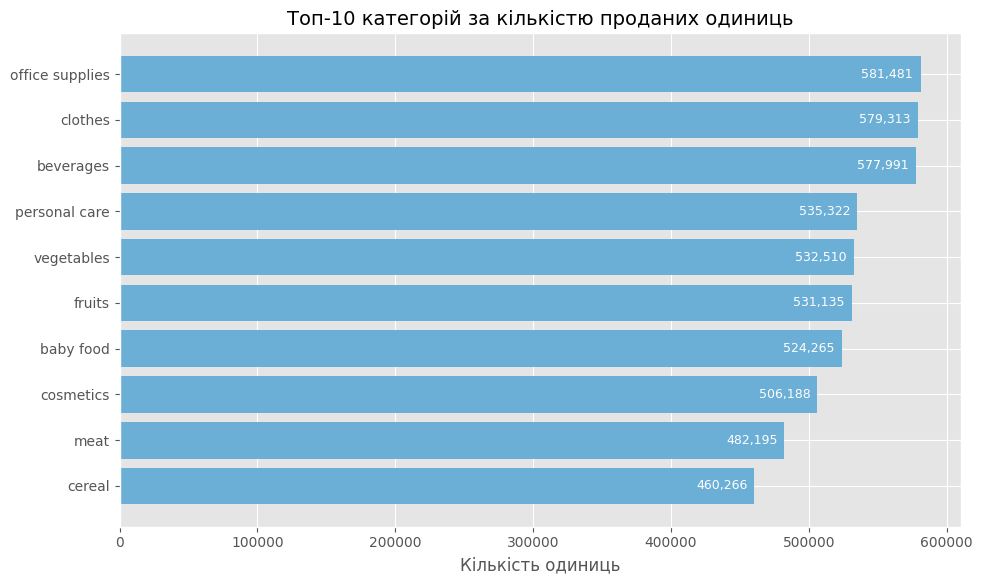

In [ ]:
top_units = category_stats.sort_values("Total Units Sold", ascending=False).head(10)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_units.index[::-1], top_units["Total Units Sold"][::-1], color='#6baed6')  # М’який блакитний

plt.title("Топ-10 категорій за кількістю проданих одиниць", fontsize=14)
plt.xlabel("Кількість одиниць", fontsize=12)

# Значення всередині кожного бару
for bar in bars:
    width = bar.get_width()
    plt.text(width - width * 0.01, bar.get_y() + bar.get_height() / 2,
             f'{int(width):,}', va='center', ha='right', color='white', fontsize=9)

plt.tight_layout()
plt.show()


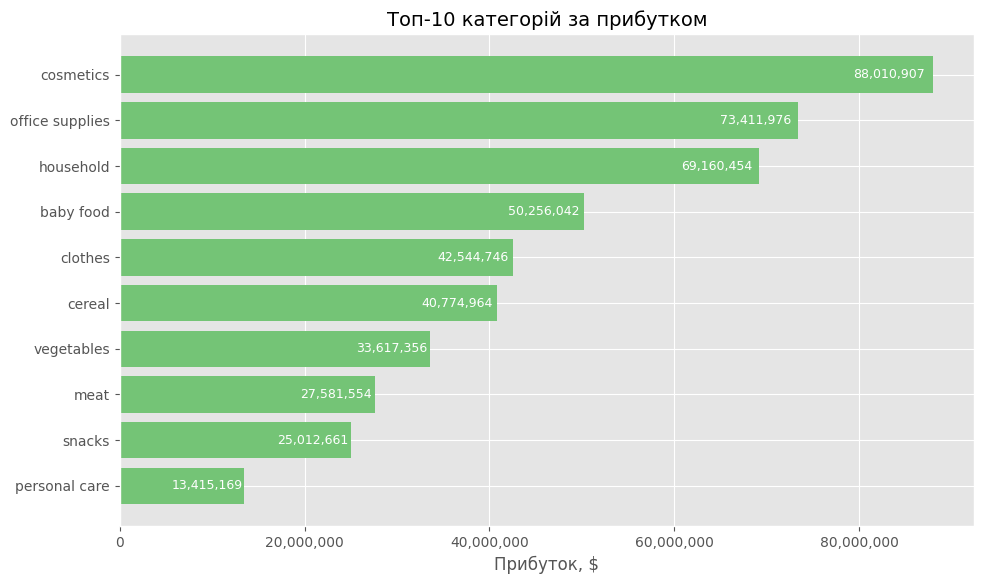

In [ ]:
top_profit = category_stats.sort_values("Total Profit", ascending=False).head(10)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_profit.index[::-1], top_profit["Total Profit"][::-1], color='#74c476')  # М’який зелений

plt.title("Топ-10 категорій за прибутком", fontsize=14)
plt.xlabel("Прибуток, $", fontsize=12)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Підписи всередині барів
for bar in bars:
    width = bar.get_width()
    plt.text(width - width * 0.01, bar.get_y() + bar.get_height() / 2,
             f'{int(width):,}', va='center', ha='right', color='white', fontsize=9)

plt.tight_layout()
plt.show()

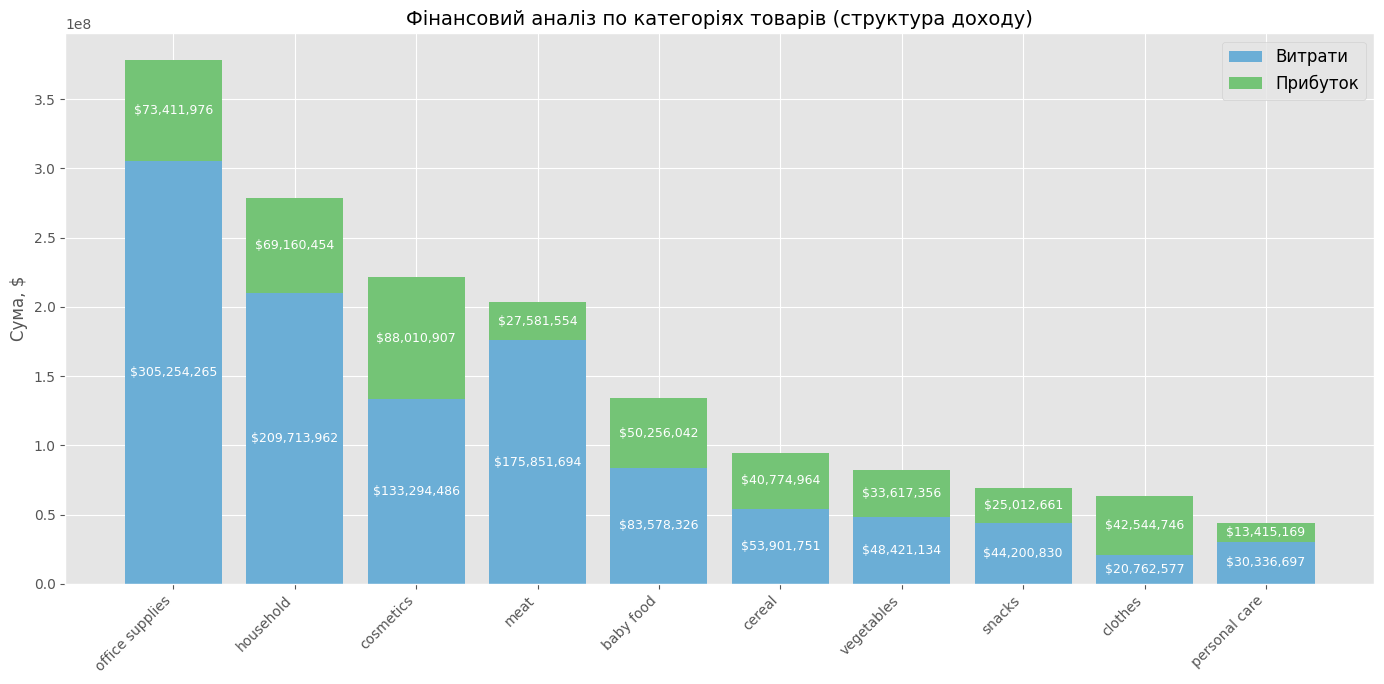

In [ ]:
top_revenue_cost = category_stats.sort_values("Total Revenue", ascending=False).head(10)

plt.figure(figsize=(14, 7))

categories = top_revenue_cost.index
x = range(len(categories))

costs = top_revenue_cost["Total Cost"]
profits = top_revenue_cost["Total Profit"]

# М’які кольори: синій (витрати) і зелений (прибуток)
bar_costs = plt.bar(x, costs, label="Витрати", color='#6baed6')
bar_profits = plt.bar(x, profits, bottom=costs, label="Прибуток", color='#74c476')

# Підписи всередині барів
for i in x:
    cost_val = costs.iloc[i]
    profit_val = profits.iloc[i]

    # Витрати
    plt.text(i, cost_val / 2, f'${int(cost_val):,}', ha='center', va='center', color='white', fontsize=9)

    # Прибуток
    plt.text(i, cost_val + profit_val / 2, f'${int(profit_val):,}', ha='center', va='center', color='white', fontsize=9)

plt.xticks(x, categories, rotation=45, ha='right')
plt.title("Фінансовий аналіз по категоріях товарів (структура доходу)", fontsize=14)
plt.ylabel("Сума, $", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

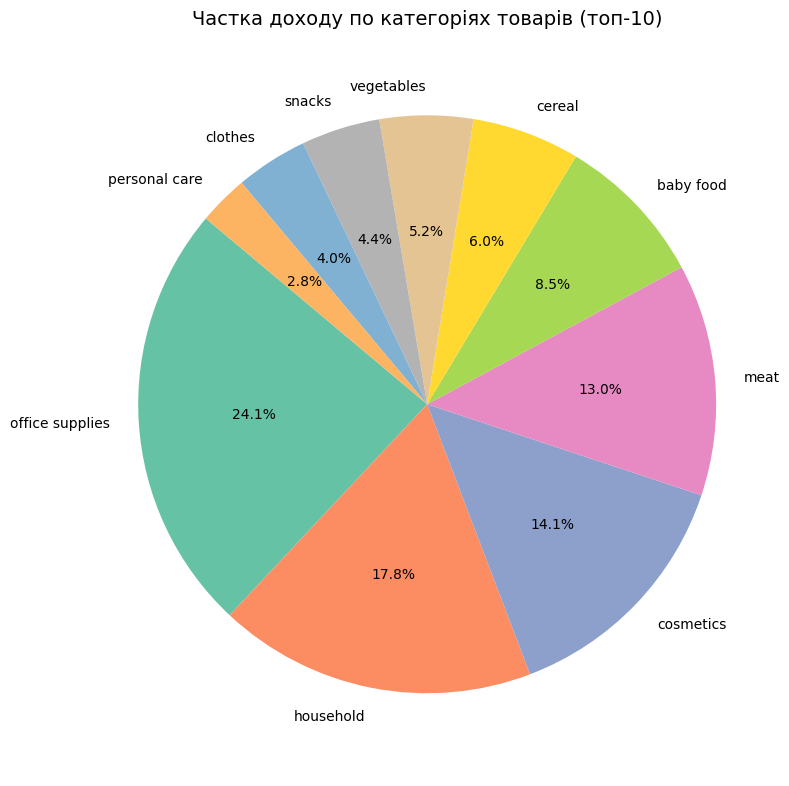

In [ ]:
plt.style.use('ggplot')

top_revenue_share = category_stats.sort_values("Total Revenue", ascending=False).head(10)

labels = top_revenue_share.index
sizes = top_revenue_share["Total Revenue"]

# М'яка палітра кольорів (пастельні відтінки)
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854',
          '#ffd92f', '#e5c494', '#b3b3b3', '#80b1d3', '#fdb462']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Частка доходу по категоріях товарів (топ-10)", fontsize=14)
plt.axis('equal')

plt.tight_layout()
plt.show()

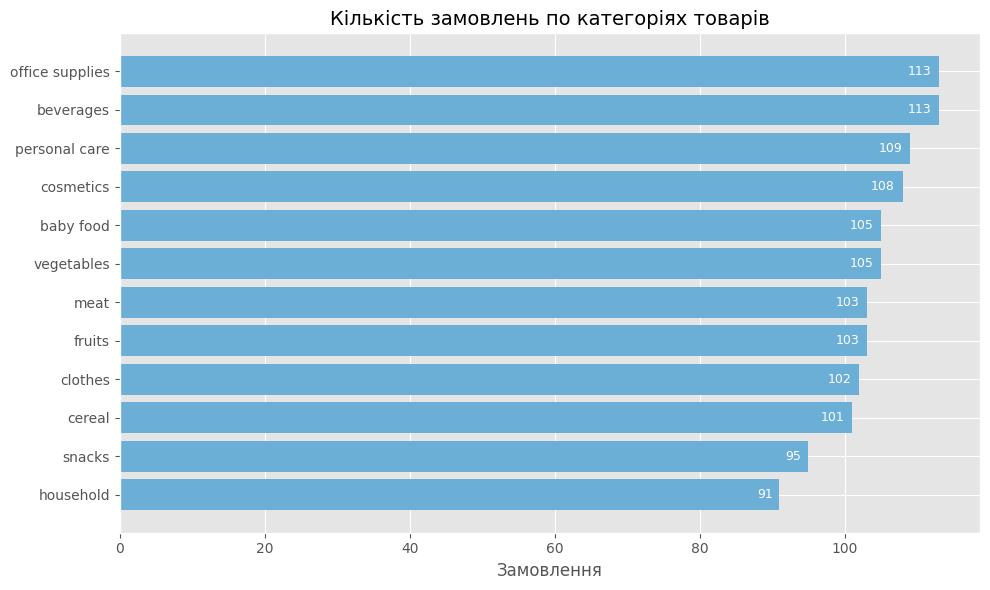

In [ ]:
orders_by_category = category_stats.sort_values("Number of Orders", ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.barh(orders_by_category.index[::-1], orders_by_category["Number of Orders"][::-1], color='#6baed6')  # м’який блакитний

plt.title("Кількість замовлень по категоріях товарів", fontsize=14)
plt.xlabel("Замовлення", fontsize=12)

# Додаємо підписи всередину кожного бару
for bar in bars:
    width = bar.get_width()
    plt.text(width - width * 0.01, bar.get_y() + bar.get_height() / 2,
             f'{int(width):,}', ha='right', va='center', color='white', fontsize=9)

plt.tight_layout()
plt.show()

**ТОП -5 категорій за прибутком:**

- Cosmetics -	88.0M	- Висока рентабельність, хороша маржа;
- Office Supplies	- 73.4M	- Високий обсяг, стабільний попит;
- Household	- 69.1M	- Високий прибуток попри найменшу кількість замовлень;
- Baby Food	- 50.2M	- Менше замовлень, але висока маржа
- Clothes	- 42.5M	- Популярність + прибуток


**1. Найменш ефективні категорії:**
- Fruits — низький прибуток (1.2M) при досить великому обсязі продажів → низька маржа
- Beverages — популярні, але прибуток низький → велика конкуренція або висока собівартість
- Snacks — прибуток помірний, але нижчий за інші споживчі товари.

**2. Категорії з найменшою кількістю замовлень:**
- Household — лише 91 замовлення, але понад $69M прибутку → великі обсяги на замовлення.

Можливо, це B2B або гуртові продажі.

**Аналіз продажів в розрізі географії (країн, регіонів).**

In [ ]:
country_stats = final_merged_data.groupby("country name").agg({
    "Units Sold": "sum",
    "Revenue": "sum",
    "Cost": "sum",
    "Profit": "sum",
    "Order ID": "nunique"
}).rename(columns={
    "Units Sold": "Total Units Sold",
    "Revenue": "Total Revenue",
    "Cost": "Total Cost",
    "Profit": "Total Profit",
    "Order ID": "Number of Orders"
}).sort_values(by="Total Profit", ascending=False).round(2)

In [ ]:
region_stats = final_merged_data.groupby("region").agg({
    "Units Sold": "sum",
    "Revenue": "sum",
    "Cost": "sum",
    "Profit": "sum",
    "Order ID": "nunique"
}).rename(columns={
    "Units Sold": "Total Units Sold",
    "Revenue": "Total Revenue",
    "Cost": "Total Cost",
    "Profit": "Total Profit",
    "Order ID": "Number of Orders"
}).sort_values(by="Total Profit", ascending=False).round(2)

In [ ]:
plt.style.use('ggplot')
plt.rcParams.update({
    'font.size': 12,
    'figure.figsize': (12, 6),
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10
})

In [ ]:
# 1. Агрегування по країнах
country_stats = final_merged_data.groupby(["country name", "alpha-3"]).agg({
    "Units Sold": "sum",
    "Revenue": "sum",
    "Cost": "sum",
    "Profit": "sum",
    "Order ID": "nunique"
}).rename(columns={
    "Units Sold": "Total Units Sold",
    "Revenue": "Total Revenue",
    "Cost": "Total Cost",
    "Profit": "Total Profit",
    "Order ID": "Number of Orders"
}).reset_index().round(2)

# 2. Верхній регістр alpha-3
country_stats["alpha-3"] = country_stats["alpha-3"].str.upper()

# 3. Власна м’яка кольорова палітра
custom_colors = [
    "#f7fcf5",  # світлий відтінок
    "#c7e9c0",
    "#74c476",
    "#238b45",
    "#084081"   # темно-синьо-фіолетовий, менш насичений
]

# 4. Побудова карти
choropleth = px.choropleth(
    country_stats,
    locations="alpha-3",
    color="Total Profit",
    hover_name="country name",
    color_continuous_scale=custom_colors,
    title="📍 Прибутковість по країнах"
)

# 5. Підказки з форматуванням
choropleth.update_traces(
    hovertemplate="<b>%{hovertext}</b><br>Прибуток: $%{z:,.0f}<extra></extra>"
)

# 6. Підписи країн
scatter_labels = go.Scattergeo(
    locationmode='ISO-3',
    locations=country_stats["alpha-3"],
    text=country_stats["country name"],
    mode='text',
    textfont=dict(size=10, color='#333333', family="Arial"),
    hoverinfo='skip',
    showlegend=False
)

choropleth.add_trace(scatter_labels)

# 7. Геооформлення
choropleth.update_geos(
    projection_type="natural earth",
    showland=True,
    landcolor="whitesmoke",
    showocean=True,
    oceancolor="aliceblue",
    showlakes=True,
    lakecolor="aliceblue",
    showcountries=True,
    countrycolor="gray",
    lonaxis=dict(range=[10, 70]),
    lataxis=dict(range=[35, 70])
)

# 8. Стиль
choropleth.update_layout(
    title_font=dict(size=20, family="Arial", color="black"),
    font=dict(family="Arial", size=12),
    margin=dict(l=20, r=20, t=50, b=20),
    coloraxis_colorbar=dict(
        title="Прибуток ($)",
        ticksuffix=" $",
        titlefont=dict(size=14),
        tickfont=dict(size=12)
    )
)

# 9. Відображення
choropleth.show()

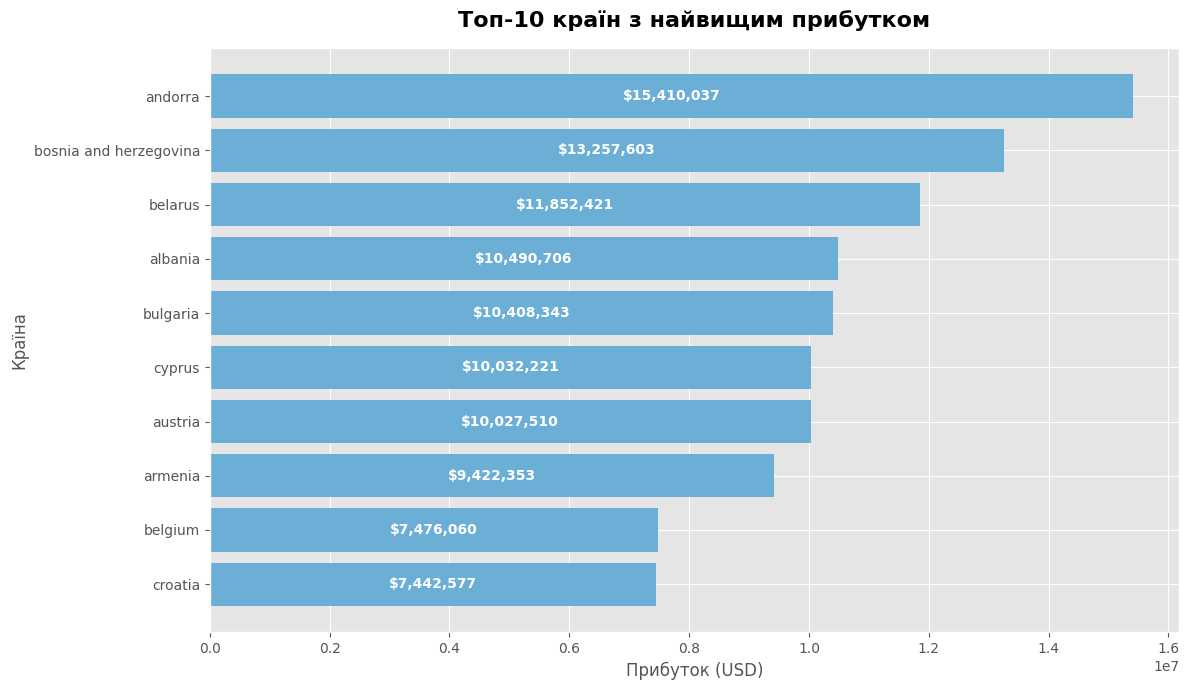

In [ ]:
# Стиль графіка
plt.style.use('ggplot')

# Вибір і сортування топ-10 країн з найбільшим прибутком (зверху вниз)
top_10_profit = country_stats.head(10).reset_index().sort_values(by="Total Profit", ascending=False)

# Побудова графіка
fig, ax = plt.subplots(figsize=(12, 7))
bars = ax.barh(top_10_profit["country name"], top_10_profit["Total Profit"], color='#6baed6')

# Заголовок і підписи
ax.set_title("Топ-10 країн з найвищим прибутком", fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel("Прибуток (USD)", fontsize=12)
ax.set_ylabel("Країна", fontsize=12)

# Інверсія осі Y, щоб найбільший був зверху
ax.invert_yaxis()

# Додавання підписів
for bar in bars:
    width = bar.get_width()
    ax.text(width * 0.5, bar.get_y() + bar.get_height() / 2,
            f"${width:,.0f}", ha='center', va='center',
            fontsize=10, color='white', fontweight='bold')

# Показ графіка
plt.tight_layout()
plt.show()

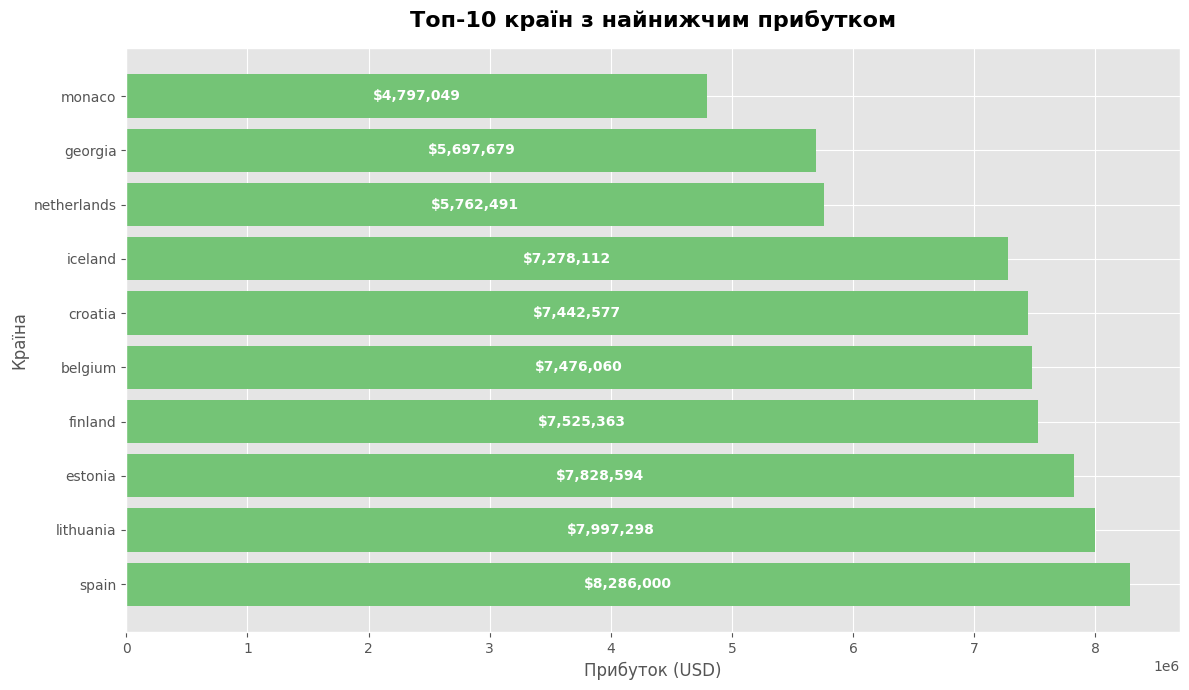

In [ ]:
# Стиль графіка
plt.style.use('ggplot')

# Вибір топ-10 країн з найнижчим прибутком
bottom_10_profit = country_stats.sort_values(by="Total Profit", ascending=True).head(10).reset_index()

# Побудова графіка
fig, ax = plt.subplots(figsize=(12, 7))
bars = ax.barh(bottom_10_profit["country name"], bottom_10_profit["Total Profit"], color='#74c476')  # м’який зелений

# Заголовок і підписи
ax.set_title("Топ-10 країн з найнижчим прибутком", fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel("Прибуток (USD)", fontsize=12)
ax.set_ylabel("Країна", fontsize=12)

# Інверсія осі Y, щоб найменший був вгорі
ax.invert_yaxis()

# Додавання підписів
for bar in bars:
    width = bar.get_width()
    ax.text(width * 0.5, bar.get_y() + bar.get_height() / 2,
            f"${width:,.0f}", ha='center', va='center',
            fontsize=10, color='white', fontweight='bold')

# Показ графіка
plt.tight_layout()
plt.show()

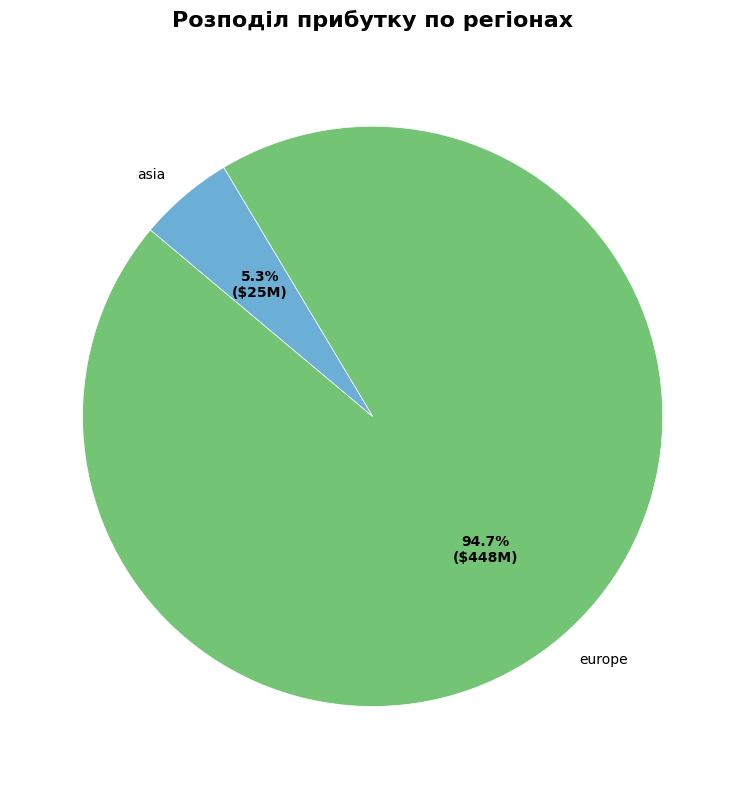

In [ ]:
# Стиль графіка
plt.style.use('ggplot')

# Дані
labels = region_stats.index
profits = region_stats["Total Profit"]

# Кольори (чередування м’якого зеленого та блакитного)
colors = ['#74c476', '#6baed6'] * (len(profits) // 2 + 1)

# Побудова pie chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    profits,
    labels=labels,
    autopct=lambda pct: f'{pct:.1f}%\n(${int(pct/100 * profits.sum() / 1_000_000)}M)',
    startangle=140,
    colors=colors[:len(profits)],
    wedgeprops=dict(edgecolor='white')
)

# Заголовок
ax.set_title("Розподіл прибутку по регіонах", fontsize=16, fontweight='bold', pad=20)

# Покращення вигляду підписів
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')

# Показ
plt.tight_layout()
plt.show()

**ТОП-10 країн за чистим прибутком:**
- Andorra - Висока маржа, стабільна кількість замовлень;
- Ukraine - Високі обсяги продажів і дуже вигідні маржі;
- Malta - Хороший баланс між обсягами і ефективністю;
- San Marino - Часті замовлення, стабільний прибуток;
- Hungary - Висока прибутковість при меншій кількості угод;
- Macedonia - Активний ринок із відносно високим ROI;
- Czech Republic - Потужна країна з високим доходом;
- Russia - Великий ринок з високим обігом;
- Bosnia & Herzegovina - Схожа на Україну за поведінкою;
-Greece - Ефективна країна, хоча й нижче за доходом.



**Країни з низьким прибутком:**
- Monaco - Мала кількість замовлень (13), вузький ринок;
- Netherlands - Середній обсяг замовлень, але низький чек;
- Georgia - Мала база замовлень + менший середній дохід.

1. Критична залежність від одного регіону (Europe)

Europe генерує понад 94% прибутку, отже:
- бізнес фактично концентрований у одному регіоні.
- це високий операційний ризик: будь-які економічні, політичні чи логістичні збої в Європі можуть паралізувати весь прибуток компанії.

2. Недореалізований потенціал ринку Азії
Asia — величезний ринок, але прибуток мізерний ($25M):

Це або низький обсяг продажів, або високі витрати, або невдале позиціонування продукту.




**Аналіз продажів в розрізі каналів продажу (онлайн або офлайн).**

In [ ]:
channel_stats = final_merged_data.groupby("Sales Channel").agg({
    "Units Sold": "sum",
    "Revenue": "sum",
    "Cost": "sum",
    "Profit": "sum",
    "Order ID": "nunique"
}).rename(columns={
    "Units Sold": "Total Units Sold",
    "Revenue": "Total Revenue",
    "Cost": "Total Cost",
    "Profit": "Total Profit",
    "Order ID": "Number of Orders"
}).sort_values(by="Total Profit", ascending=False).round(2)


In [ ]:
# Дані
channels = channel_stats.index.tolist()

fig = go.Figure()

# Витрати (нижній шар)
fig.add_trace(go.Bar(
    x=channels,
    y=channel_stats["Total Cost"],
    name="Витрати",
    marker_color='#6baed6',  # м’який блакитний
    hovertemplate='Канал: %{x}<br>Витрати: %{y:,.0f} $'
))

# Прибуток (верхній шар)
fig.add_trace(go.Bar(
    x=channels,
    y=channel_stats["Total Profit"],
    name="Прибуток",
    marker_color='#74c476',  # м’який зелений
    hovertemplate='Канал: %{x}<br>Прибуток: %{y:,.0f} $'
))

# Оформлення графіка
fig.update_layout(
    title="Фінансовий аналіз каналів продажу (структура доходу)",
    xaxis_title="Канал продажу",
    yaxis_title="Сума, $",
    barmode='stack',
    template='ggplot2',
    legend=dict(title="Метрика"),
    font=dict(family="Arial", size=14)
)

fig.show()

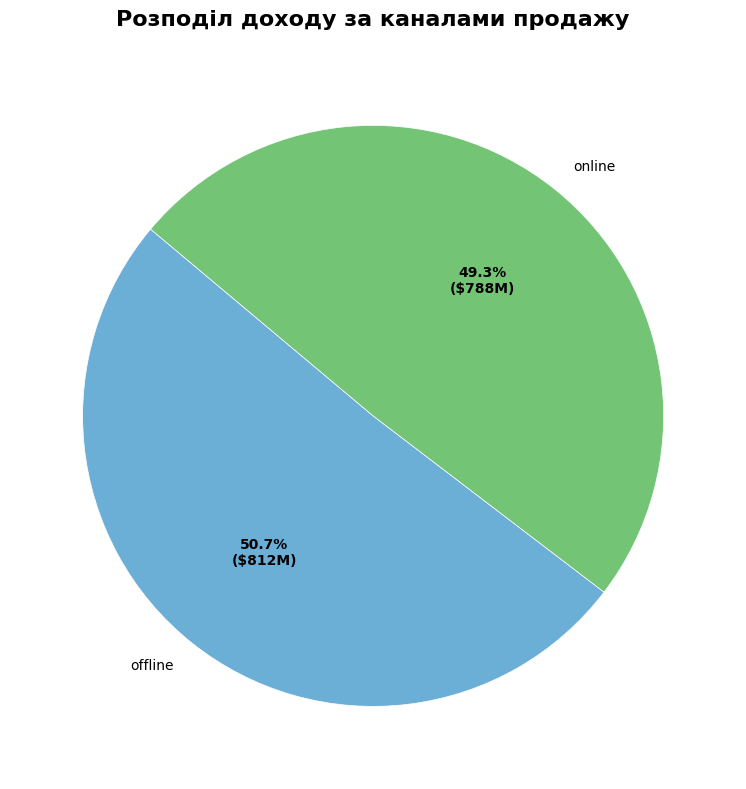

In [ ]:
# Стиль графіка
plt.style.use('ggplot')

# Дані для побудови
labels = channel_stats.index
revenues = channel_stats["Total Revenue"]

# Кольори: м’який зелений для Online, м’який блакитний для Offline (або навпаки)
colors = ['#74c476', '#6baed6'] if 'Online' in labels[0] else ['#6baed6', '#74c476']

# Побудова pie chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    revenues,
    labels=labels,
    autopct=lambda pct: f'{pct:.1f}%\n(${int(pct/100 * revenues.sum() / 1_000_000)}M)',
    startangle=140,
    colors=colors,
    wedgeprops=dict(edgecolor='white')
)

# Заголовок
ax.set_title("Розподіл доходу за каналами продажу", fontsize=16, fontweight='bold', pad=20)

# Стилізація підписів
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')

# Показ графіка
plt.tight_layout()
plt.show()

**1. Загальна ефективність — майже паритет:**
- Онлайн і офлайн показують дуже схожі обсяги замовлень, прибутку та продажів.
- Різниця в прибутку — всього ~ $3.1M (~1.3%).

**2.Офлайн = трохи більше продажів, трохи більше прибутку:**
- +65,000 одиниць товарів продано більше в офлайні.
- Прибуток на замовлення (середній):

Offline: $238.9M / 623 ≈ $383K

Online: $235.2M / 625 ≈ $376K

**3. Вартість реалізації трохи вища офлайн:**

Це логічно, адже офлайн-канал включає:
- складські витрати,
- логістику до точок,
- персонал, обслуговування.

Тепер проаналізуємо інтервал часу між замовленням та його відвантаженням та зробимо відповідні візуалізації в розрізі:

- категорій товарів;
- країн;
- регіонів.

**Аналіз  інтервалу часу між замовленням та його відвантаженням в розрізі категорій товарів.**

In [ ]:
final_merged_data["Shipping Time (days)"] = (final_merged_data["Ship Date"] - final_merged_data["Order Date"]).dt.days # Додамо в датасет нову колонку та зробимо розрахунок часу доставки

In [ ]:
shipping_stats = final_merged_data.groupby("item_type").agg({
    "Shipping Time (days)": ["mean", "min", "max", "count"]
}).round(1)

# Покращимо назви колонок
shipping_stats.columns = [
    "Average Shipping Time (days)",
    "Min Shipping Time",
    "Max Shipping Time",
    "Number of Orders"
]

# Відсортуємо за середнім часом доставки
shipping_stats = shipping_stats.sort_values("Average Shipping Time (days)", ascending=False)
print(f"Аналіз інтервалу часу між замовленням та його відвантаженням в розрізі категорій товарів: \n{shipping_stats}") plt.style.use('ggplot')
plt.rcParams.update({
    'font.size': 12,
    'figure.figsize': (12, 6),
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'axes.titlepad': 15
})

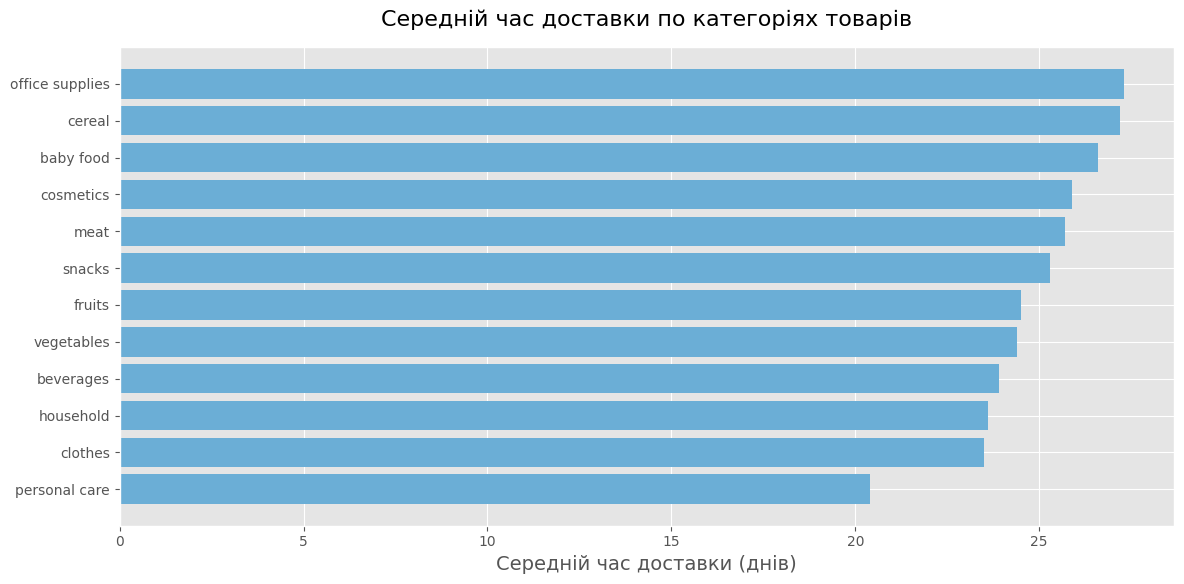

In [ ]:
# Стиль графіка
plt.style.use('ggplot')
plt.rcParams.update({
    'font.size': 12,
    'figure.figsize': (12, 6),
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'axes.titlepad': 15
})

# Відсортувати категорії за зростанням середнього часу доставки
shipping_stats_sorted = shipping_stats.sort_values("Average Shipping Time (days)", ascending=True)

# Побудова графіка
plt.figure()
plt.barh(
    shipping_stats_sorted.index,
    shipping_stats_sorted["Average Shipping Time (days)"],
    color='#6baed6'  # м’який блакитний
)

# Назви осей та заголовок
plt.title("Середній час доставки по категоріях товарів")
plt.xlabel("Середній час доставки (днів)")

# Відображення графіка
plt.tight_layout()
plt.show()

**1. Категорії з довгим середнім часом доставки:**
Office Supplies, Cereal, Baby Food — 27 днів і більше

Це потенційно критичні категорії для клієнтів (особливо baby food або офісні товари).

Ризик:
- Можливе зниження задоволеності клієнтів.
- Порушення SLA (service-level agreement) у B2B сегменті.

**2. Категорії з найшвидшою доставкою:**
Personal Care, Clothes, Household — 20–24 дні.

Це може свідчити про:
- Локальні склади / часті поставки
- Менший обсяг партій / простіша логістика.

**3. Замовлень багато — але розкид по доставці великий:**
У всіх категорій максимальний час доставки — 50 днів, а мінімальний — 0–1 день.

Це означає:
- Дуже нерівномірне забезпечення поставок.
- Ймовірні затримки в окремих регіонах або партіях.


**Аналіз інтервалу часу між замовленням та його відвантаженням в розрізі країн.**

In [ ]:
shipping_country = final_merged_data.groupby("country name").agg({
    "Shipping Time (days)": ["mean", "min", "max", "count"]
}).round(1)

# Покращимо назви колонок
shipping_country.columns = [
    "Average Shipping Time (days)",
    "Min Shipping Time",
    "Max Shipping Time",
    "Number of Orders"
]

# Відсортуємо за середнім часом доставки
shipping_country = shipping_country.sort_values("Average Shipping Time (days)", ascending=False)

In [ ]:

# 🔹 Топ-10 країн з найдовшим середнім часом доставки
top_shipping = shipping_country.sort_values("Average Shipping Time (days)", ascending=False).head(10)
top_shipping = top_shipping.reset_index()

# Використаємо м’який нейтральний градієнт (наприклад, сіро-блакитний)
neutral_scale = ['#d0dce0', '#a4b8c4', '#7898a9', '#4e6f85', '#2f4858']

fig = px.bar(
    top_shipping,
    x="Average Shipping Time (days)",
    y="country name",
    orientation='h',
    color="Average Shipping Time (days)",
    color_continuous_scale=neutral_scale,
    hover_data={
        "Min Shipping Time": True,
        "Max Shipping Time": True,
        "Number of Orders": True
    },
    title="Топ-10 країн з найдовшим середнім часом доставки",
    labels={"country name": "Країна"}
)

fig.update_layout(
    yaxis=dict(autorange="reversed"),  # щоб найповільніші були згори
    template='ggplot2',
    font=dict(family="Arial", size=14),
    coloraxis_colorbar=dict(title="Середній час (днів)")
)

fig.show()


- Середній час доставки	- Від 18.2 до 32.6 днів → значна варіативність;
- Максимальні затримки - Досягають 50 днів майже в усіх країнах;
- Мінімальний час доставки - У багатьох країнах є доставки за 0–3 дні;
- Обсяг замовлень - 20–40+ замовлень на країну → статистично достовірні.



**Аналіз інтервалу часу між замовленням та його відвантаженням в розрізі регіонів.**

In [ ]:
shipping_region = final_merged_data.groupby("region").agg({
    "Shipping Time (days)": ["mean", "min", "max", "count"]
}).round(1)

# Покращимо назви колонок
shipping_region.columns = [
    "Average Shipping Time (days)",
    "Min Shipping Time",
    "Max Shipping Time",
    "Number of Orders"
]

# Відсортуємо за середнім часом доставки
shipping_region = shipping_region.sort_values("Average Shipping Time (days)", ascending=False)

In [ ]:
# Підготовка
shipping_region_reset = shipping_region.reset_index()

# Нормалізація: округлення для лейблів, уникаємо надмірної деталізації
shipping_region_reset["Average Shipping Time (days)"] = shipping_region_reset["Average Shipping Time (days)"].round(1)

# Градієнт м’яких сіро-блакитних кольорів
neutral_scale = ['#d0dce0', '#a4b8c4', '#7898a9', '#4e6f85', '#2f4858']

# Побудова pie chart
fig = px.pie(
    shipping_region_reset,
    names="region",
    values="Average Shipping Time (days)",
    color="Average Shipping Time (days)",
    color_discrete_sequence=neutral_scale,
    title="Розподіл середнього часу доставки по регіонах",
    hole=0.3  # Напів-донат стиль для сучаснішого вигляду
)

fig.update_traces(
    textinfo='percent+label',
    hovertemplate="Регіон: %{label}<br>Середній час: %{value} днів<br>Частка: %{percent}"
)

fig.update_layout(
    template='ggplot2',
    font=dict(family="Arial", size=14),
    legend_title_text="Регіон"
)

fig.show()

Тепер проаналізуємо чи залежить прибуток від часу, необхідного на відвантаження товару.

In [ ]:
# Групування по часу доставки (в днях)
shipping_profit_corr = final_merged_data.groupby("Shipping Time (days)").agg({
    "Profit": ["mean", "sum", "count"]
}).reset_index()

# Покращимо назви колонок
shipping_profit_corr.columns = ["Shipping Time (days)", "Average Profit", "Total Profit", "Number of Orders"]


In [ ]:
fig = px.scatter(
    shipping_profit_corr,
    x="Shipping Time (days)",
    y="Total Profit",
    title="📈 Залежність сумарного прибутку від часу доставки",
    labels={
        "Shipping Time (days)": "Час доставки (днів)",
        "Total Profit": "Сумарний прибуток ($)"
    },
    template="ggplot2"
)

fig.update_traces(
    marker=dict(size=8, color="#74c476")  # м’який зелений
)

fig.update_layout(
    font=dict(family="Arial", size=14),
    margin=dict(l=60, r=40, t=60, b=60)
)

fig.show()

1. Явної сильної кореляції немає
— Прибуток не зростає і не зменшується строго разом із часом доставки. Є високоприбуткові значення і при 10, і при 40 днях доставки.

2. Прибуток розкиданий у широкому діапазоні
— Це свідчить, що на прибуток впливають інші фактори (наприклад: тип товару, країна, пріоритет, канал продажу), а не лише логістика.

3. Невеликий «завал» середнього прибутку на проміжку 10–20 днів
— Там видно спад до ~$250–300k, але потім середній прибуток знову стабілізується чи навіть зростає.

4. Найвищий сумарний прибуток (жовті точки) — часто не на найкоротших відвантаженнях
— Це ще раз підтверджує, що прибуток не лінійно залежить від часу доставки.

Тепер проаналізуємо за допомогою візуалізації динаміку продажів (у часі) у розрізі категорій товарів, країн, регіонів та визначимо основні тенденції.

In [ ]:
# Побудова графіка з підписами
fig = px.line(
    category_trend,
    x="Order Month",
    y="Revenue",
    color="item_type",
    facet_col="item_type",
    facet_col_wrap=1,
    markers=True,
    text=category_trend["Revenue"].apply(lambda x: f"${x/1_000_000:.1f}M"),  # форматовані підписи
    title="Динаміка продажів по топ-3 категоріях (останні 2 роки)",
    labels={
        "Order Month": "Місяць",
        "Revenue": "Дохід ($)",
        "item_type": "Категорія"
    },
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Оформлення
fig.update_layout(
    template="ggplot2",
    font=dict(family="Arial", size=13),
    height=900,
    showlegend=False,
    margin=dict(t=70, l=50, r=50, b=60)
)

# Покращення заголовків
fig.for_each_annotation(lambda a: a.update(
    text=a.text.split("=")[-1].strip().title(),
    font=dict(size=15, family="Arial", color="black"),
    align="center"
))

# Позиція підписів
fig.update_traces(textposition="top center", textfont_size=10)

# Незалежна шкала Y
fig.update_yaxes(matches=None)

fig.show()

1. Household — найбільш волатильна категорія

У середині 2016 року (липень–серпень) спостерігається стрімкий пік (≈14M), потім різке падіння.

Це може вказувати на:
- сезонний попит (наприклад, літні ремонти, переїзди);
- маркетингову кампанію або промоції;
- разову закупівлю великими клієнтами (наприклад, корпоративні чи урядові контракти).

2. Office supplies — стабільні, але з періодичними сплесками

Категорія має регулярні хвилі — зростання навесні (квітень–травень) та наприкінці зими (лютий–березень).

Це може вказувати на:
- закупівлі в бюджетних організаціях (початок фінансового року, закупівлі до нового кварталу);
- офісні перезапуски після свят чи літніх канікул.

3. Cosmetics — зростання взимку та весною 2017

Починаючи з грудня 2016 до березня 2017 спостерігається стійке зростання.

Імовірно пов’язане з:
- святковими закупівлями (Різдво, Новий рік, 8 березня);
- сезонною зміною попиту (зимовий догляд, подарункові набори).

In [ ]:
fig = px.line(
    country_trend,
    x="Order Month",
    y="Revenue Smoothed",
    facet_col="country name",
    facet_col_wrap=2,
    markers=True,
    text=country_trend["Revenue Smoothed"].apply(lambda x: f"${x/1_000_000:.1f}M"),
    title="📊 Динаміка продажів по топ-5 країнах (останні 2 роки)",
    labels={
        "Order Month": "Місяць",
        "Revenue Smoothed": "Дохід ($)",
        "country name": "Країна"
    },
    template="ggplot2",
    color_discrete_sequence=["#74c476"]
)

fig.update_traces(
    line=dict(width=2),
    marker=dict(size=6),
    textposition="top center",
    textfont_size=10
)

fig.update_layout(
    font=dict(family="Arial", size=13),
    height=900,
    showlegend=False,
    margin=dict(t=70, l=50, r=50, b=60)
)

for axis in fig.layout:
    if axis.startswith("xaxis"):
        fig.layout[axis].showticklabels = True
        fig.layout[axis].tickformat = "%b\n%Y"

fig.for_each_annotation(lambda a: a.update(
    text=a.text.split("=")[-1].strip().title(),
    font=dict(size=15, family="Arial", color="black"),
    align="center"
))

fig.update_yaxes(matches=None)
fig.show()


Macedonia — стабільне зростання
- Чіткий висхідний тренд із січня 2016 до середини 2017.
- Жодних різких спадів — зростання рівномірне.

Ukraine — вибухове, але нестабільне зростання
- Спостерігається стрімкий підйом з кінця 2016 до весни 2017, але з коливаннями.
- Можливе запізніле входження на ринок або запуск великої промо-кампанії.

Andorra — піковий сплеск і спад
- 2016 рік — висока активність, але у 2017 чіткий спад.
- Можливе вичерпання короткострокової потреби, або втрачений контракт.

San Marino — хвилеподібна динаміка
- Видно кілька підйомів і спадів, без чіткого тренду.
- Схоже на разові закупівлі або нестабільну логістику.

Latvia — рівномірне, помірне зростання
- Немає яскравих піків, але спостерігається плавний розвиток.
- Може свідчити про високий рівень ринку, що вже сформувався.

In [ ]:
# Фільтрація за останні 2 роки
max_year = final_merged_data["Order Date"].dt.year.max()
filtered_data = final_merged_data[final_merged_data["Order Date"].dt.year >= max_year - 1].copy()

# Використовуємо готову колонку "Order Month"
# Агрегація по регіонах і місяцях
region_trend = (
    filtered_data
    .groupby(["Order Month", "region"])["Revenue"]
    .sum()
    .reset_index()
    .sort_values(by=["region", "Order Month"])
)

# Згладжування (rolling average)
region_trend["Smoothed Revenue"] = (
    region_trend
    .groupby("region")["Revenue"]
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

# Побудова графіка
fig = px.line(
    region_trend,
    x="Order Month",
    y="Smoothed Revenue",
    color="region",
    markers=True,
    text=region_trend["Smoothed Revenue"].apply(lambda x: f"${x/1_000_000:.1f}M"),
    title="Динаміка продажів по регіонах (останні 2 роки)",
    labels={
        "Order Month": "Місяць",
        "Smoothed Revenue": "Дохід ($)",
        "region": "Регіон"
    },
    color_discrete_sequence=['#6baed6', '#74c476']
)

fig.update_traces(
    hovertemplate="Регіон: %{color}<br>Місяць: %{x}<br>Дохід: %{y:$,.0f}<extra></extra>",
    textposition="top center",
    textfont_size=10,
    line=dict(width=2)
)

fig.update_layout(
    template="ggplot2",
    xaxis_tickangle=-45,
    font=dict(family="Arial", size=14),
    legend=dict(
        title="Регіон",
        orientation="v",
        y=0.5,
        x=1.02,
        valign="middle",
        bordercolor="lightgray",
        borderwidth=1
    ),
    yaxis_tickformat="$.1s",
    margin=dict(l=60, r=40, t=60, b=60)
)

fig.show()

1. Europe — домінуючий ринок із сезонністю

Рівень продажів стабільно високий: у межах $10M–$24M на місяць.

Видно циклічність — зниження в березні–травні 2016, піки в серпні–жовтні 2016, новий підйом взимку 2017.

У 2017 році — стабілізація на рівні ~$16–$18M.

Інтерпретація:
- Це зрілий ринок з великою клієнтською базою.
- Сезонність може бути пов’язана з закупівлями B2B (наприклад, бюджетні цикли компаній, тендери, контракти з установами).

2. Asia — ринок із низьким, але поступовим зростанням

Весь період значно нижчий за Europe: $0.9M–$2.5M на місяць.

Проте є стійкий тренд на зростання після весни 2017.

Інтерпретація:

Азійський ринок — поки що слабко розвинений, або:
- бізнес щойно вийшов на ринок;
- є логістичні чи регуляторні бар'єри;
- продукт ще не локалізований (наприклад, мовно або культурно).



Тепер проведемо аналіз продажів товарів за днями тижня.

In [ ]:
final_merged_data["Day of Week"] = final_merged_data["Order Date"].dt.day_name() # Додамо до датасету колонку з днем тижня

In [ ]:
# Сумарний дохід по днях тижня для кожної категорії
weekday_sales = final_merged_data.groupby(["Day of Week", "item_type"])["Revenue"].sum().reset_index()

# Для впорядкування днів у звичному порядку
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_sales["Day of Week"] = pd.Categorical(weekday_sales["Day of Week"], categories=weekday_order, ordered=True)
weekday_sales = weekday_sales.sort_values(["Day of Week", "Revenue"], ascending=[True, False])

In [ ]:
fig = px.bar(
    weekday_sales,
    x="Day of Week",
    y="Revenue",
    color="item_type",
    title="Продажі товарів за днями тижня (по категоріях)",
    labels={"Revenue": "Дохід ($)", "Day of Week": "День тижня", "item_type": "Категорія товару"},
    barmode="stack"
)

fig.update_layout(
    template="ggplot2",
    font=dict(family="Arial", size=14),
    xaxis_tickangle=-45
)

fig.show()

1. Пікові дні продажів:
- Monday, Friday, Wednesday — мають найвищий сумарний дохід.
- Tuesday і Thursday — найменш активні.

2. Категорії з чітко вираженою “денною сезонністю”:
- Cosmetics	- вибухові об'єми у п’ятницю;
- Meat - сильніше купується в п’ятницю, понеділок–середу;
- Household - високі продажі в понеділок;
- Office supplies - найбільше в понеділок, п'ятницю та неділю;
- Snacks / fruits - Рівномірно, але зростають на вихідних та в понеділок.

3. Категорії з помірним розподілом:
- vegetables, personal care — стабільно присутні щодня, без явних піків.

Це може вказувати на менш емоційну або заплановану покупку, незалежну від дня.